In [1]:
import pandas as pd, numpy as np, seaborn as s,matplotlib.pyplot as plt,random
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.metrics import r2_score, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.cluster import KMeans

#########################################################################################

lr,le,ohe,ss,logr = LinearRegression(),LabelEncoder(),OneHotEncoder(),StandardScaler(),LogisticRegression()
navie = GaussianNB()

In [74]:
data = pd.read_csv(r"D:\@themightyNJ\Machine Learning\ML\Dataset-master\Mall_Customers.csv")
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [90]:
x = data[["Annual Income (k$)","Spending Score (1-100)"]].values

In [119]:
#Elbow Method to find optimum number of k
lis  = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init="k-means++",random_state=5)
    kmeans.fit(x)
    lis.append(kmeans.inertia_)
lis

[269981.28,
 181363.59595959596,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37233.81451071001,
 30259.65720728547,
 25079.766962115897,
 21850.165282585633,
 19712.851860217073]

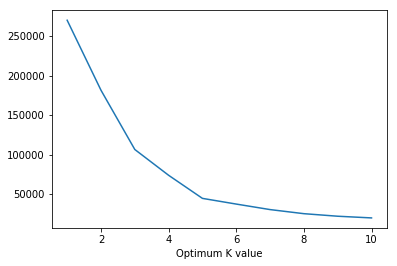

In [121]:
#Select the value on x-axis for k
plt.xlabel("Optimum K value")
plt.plot(range(1,11),lis)
plt.show()

In [100]:
kmeans = KMeans(n_clusters=5,init="k-means++",random_state=5)

In [101]:
pred = kmeans.fit_predict(x)
pred

array([3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,
       3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 1,
       3, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 4, 2, 1, 2, 4, 2, 4, 2,
       1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 1, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2])

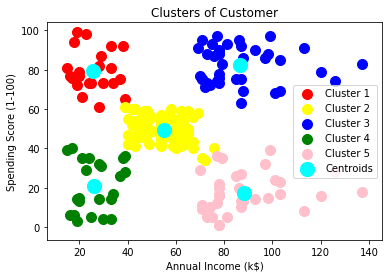

In [108]:
plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "red",label = "Cluster 1")
plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "yellow",label = "Cluster 2")
plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Cluster 3")
plt.scatter(x[pred == 3,0],x[pred == 3,1], s= 100, c = "green",label = "Cluster 4")
plt.scatter(x[pred == 4,0],x[pred == 4,1], s= 100, c = "pink",label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Clusters of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

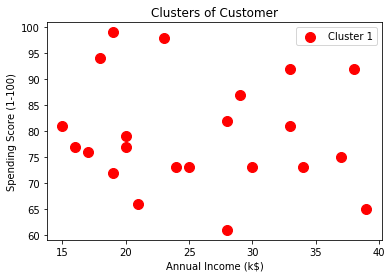

In [109]:
plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "red",label = "Cluster 1")
# plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "yellow",label = "Cluster 2")
# plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Cluster 3")
# plt.scatter(x[pred == 3,0],x[pred == 3,1], s= 100, c = "green",label = "Cluster 4")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Clusters of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

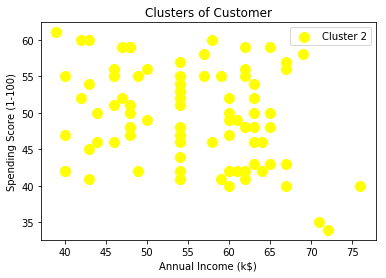

In [110]:
#plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "red",label = "Cluster 1")
plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "yellow",label = "Cluster 2")
# plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Cluster 3")
# plt.scatter(x[pred == 3,0],x[pred == 3,1], s= 100, c = "green",label = "Cluster 4")
# plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Clusters of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

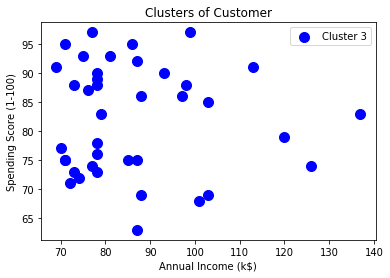

In [111]:
#plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "red",label = "Cluster 1")
#plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "yellow",label = "Cluster 2")
plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Cluster 3")
#plt.scatter(x[pred == 3,0],x[pred == 3,1], s= 100, c = "green",label = "Cluster 4")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Clusters of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

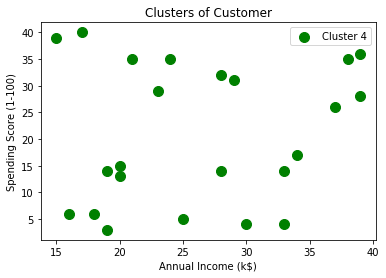

In [112]:
# plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "red",label = "Cluster 1")
# plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "yellow",label = "Cluster 2")
# plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Cluster 3")
plt.scatter(x[pred == 3,0],x[pred == 3,1], s= 100, c = "green",label = "Cluster 4")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Clusters of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

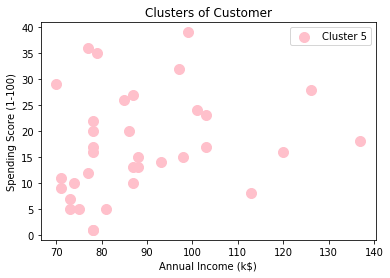

In [114]:
# plt.scatter(x[pred == 0,0],x[pred == 0,1], s= 100, c = "red",label = "Cluster 1")
# plt.scatter(x[pred == 1,0],x[pred == 1,1], s= 100, c = "yellow",label = "Cluster 2")
# plt.scatter(x[pred == 2,0],x[pred == 2,1], s= 100, c = "blue",label = "Cluster 3")
#plt.scatter(x[pred == 3,0],x[pred == 3,1], s= 100, c = "green",label = "Cluster 4")
plt.scatter(x[pred == 4,0],x[pred == 4,1], s= 100, c = "pink",label = "Cluster 5")
#plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s = 200,c = "cyan",label = "Centroids")
plt.title("Clusters of Customer")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1-100)")
plt.legend()
plt.show()

In [117]:
x[pred == 0,0] #pred == cluster_number,column_number 
#cluster0 in AnnualIncome

array([15, 16, 17, 18, 19, 19, 20, 20, 21, 23, 24, 25, 28, 28, 29, 30, 33,
       33, 34, 37, 38, 39], dtype=int64)

In [118]:
x[pred == 0,1] #pred == cluster_number,column_number
#cluster0 in Spending Score(1-100)

array([81, 77, 76, 94, 72, 99, 77, 79, 66, 98, 73, 73, 82, 61, 87, 73, 92,
       81, 73, 75, 92, 65], dtype=int64)